### Regression Analysis
Elements Of Data Science

In [3]:
# Import Numpy and Datascience modules.
import numpy as np
from datascience import *
import pandas as pd

# Plotting 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)

### Correlation

In [4]:
faithful = Table.read_table("../Lab08/faithful-new.csv")

In [5]:
faithful.stats() 

statistic,duration,wait
min,1.6,43
max,5.1,96
median,4,76
sum,948.677,19284


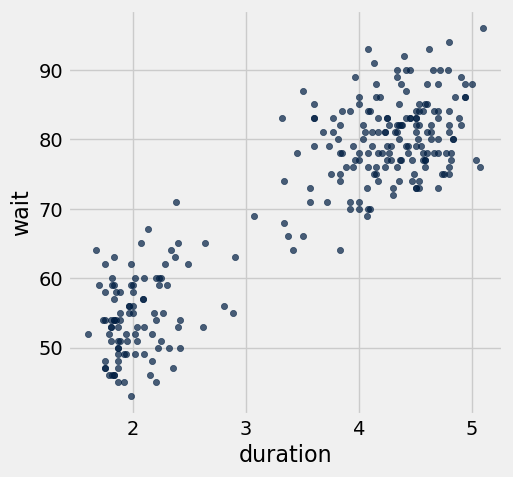

In [6]:
faithful.scatter('duration','wait')

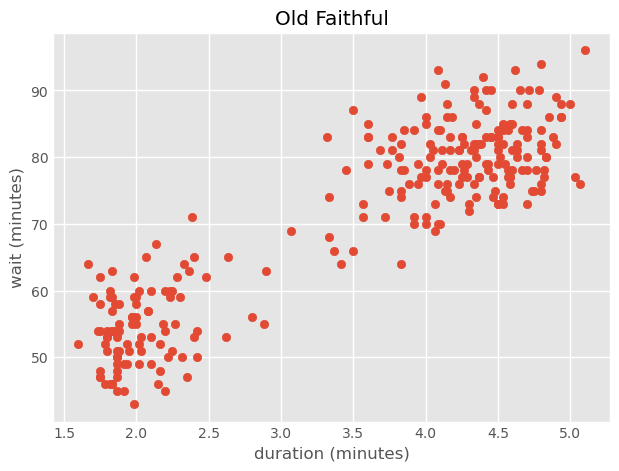

In [7]:
# Now plot
plt.style.use('ggplot')
plt.scatter(faithful.column('duration'),faithful.column('wait'))
#faithful.scatter('duration','wait') #
plt.title("Old Faithful")
plt.xlabel("duration (minutes)")
plt.ylabel("wait (minutes)")
plt.savefig("scatter.png") # Helpful way to save figure
plt.show()

In [10]:
heights = Table.read_table('data/family_heights.csv')
heights

family,father,mother,midparentHeight,children,childNum,sex,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


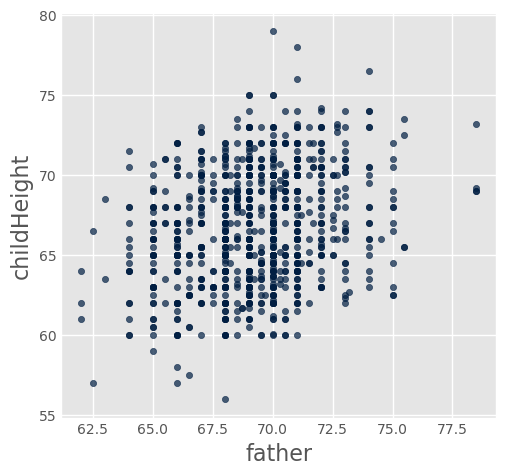

In [12]:
heights.scatter('father','childHeight')

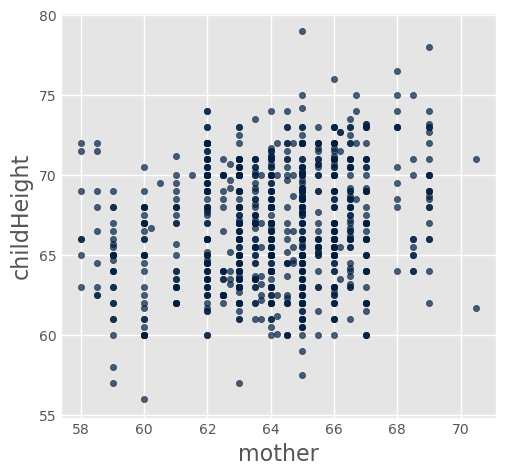

In [13]:
heights.scatter('mother','childHeight')

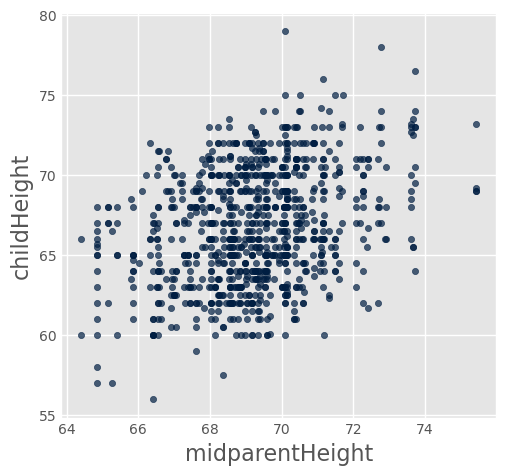

In [14]:
heights.scatter('midparentHeight','childHeight')

***
Standard Units
***
$\bar{x}$=mean$(x)$<br>
<br>variance=mean$((x-\bar{x})^2)$<br>
<br>SD = $\sqrt{<(x-\bar{x})^2>}$<br>
<br>Z = ${\frac{(x-\bar{x})}{SD}}$

In [17]:
parent_mean =  np.mean(heights["midparentHeight"])
parent_std = np.std(heights["midparentHeight"])
child_mean =  np.mean(heights["childHeight"])
child_std = np.std(heights["childHeight"])

heights_standard = Table().with_columns(
    "Parent (standard units)", (heights.column("midparentHeight") - parent_mean) / parent_std,
    "Child (standard units)", (heights.column("childHeight") - child_mean) / child_std)
heights_standard

Parent (standard units),Child (standard units)
3.45465,1.80416
3.45465,0.686005
3.45465,0.630097
3.45465,0.630097
2.47209,1.88802
2.47209,1.60848
2.47209,-0.348285
2.47209,-0.348285
1.58389,1.18917
1.58389,0.350559


In [18]:
heights_standard.stats()

statistic,Parent (standard units),Child (standard units)
min,-2.66835,-3.00389
max,3.45465,3.42547
median,0.022886,-0.0687471
sum,3.40172e-13,2.27596e-12


In [19]:
def five_num_sum(table,column):
    nums=[]
    array = table.column(column)
    nums.append(np.min(array))
    nums.append(np.max(array))
    nums.append(np.mean(array))
    nums.append(np.median(array))
    nums.append(np.std(array))
    print(f'min: {nums[0]} \nmax: {nums[1]} \nmean: {nums[2]:.3f} \nmedian: {nums[3]:.3f} \nstd: {nums[4]:.3f}')
    return nums

In [21]:
five_num_sum(heights_standard,'Parent (standard units)');

min: -2.6683465187749444 
max: 3.4546515891210525 
mean: -0.000 
median: 0.023 
std: 1.000


In [22]:
five_num_sum(heights_standard,'Child (standard units)');

min: -3.0038933105376406 
max: 3.425474519224098 
mean: 0.000 
median: -0.069 
std: 1.000


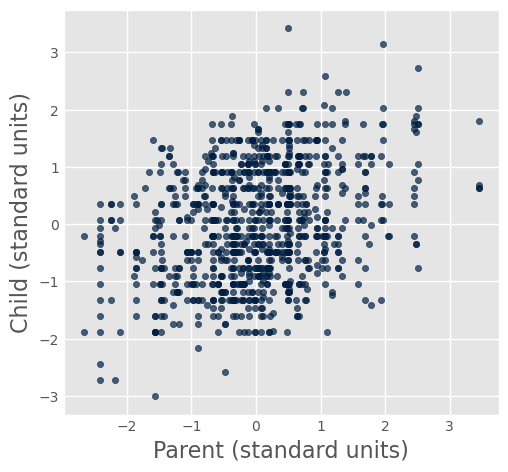

In [23]:
heights_standard.scatter("Parent (standard units)",'Child (standard units)')

In [ ]:
r = ...

In [25]:
r = np.mean(heights_standard["Parent (standard units)"]*heights_standard["Child (standard units)"])
r 

0.32094989606395924

In [34]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points. x and y are strings containing column labels"""
    xdata = dataset.column(x)
    ydata = dataset.column(y)
    plt.scatter(xdata, ydata, label="data", color='green')
    xs, ys = zip(point_0, point_1)
    plt.plot(xs, ys, label="regression line", color='blue', linestyle='--')
    plt.legend(bbox_to_anchor=(1.5,.8))

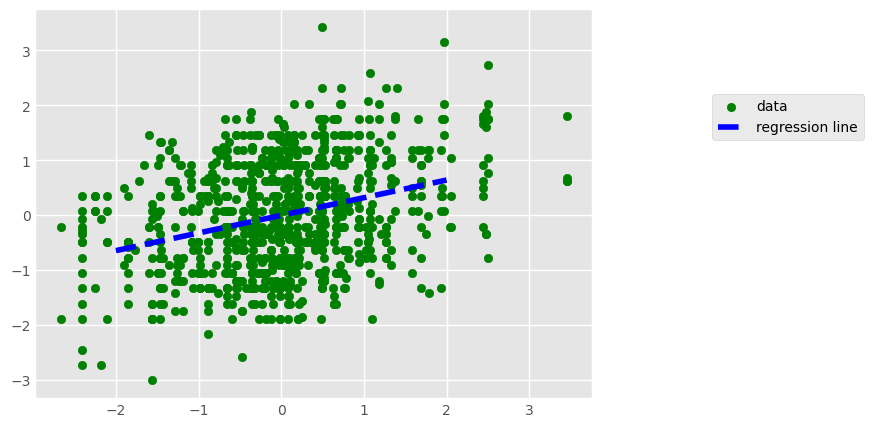

In [35]:
plot_data_and_line(heights_standard, 
                   "Parent (standard units)", 
                   "Child (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

### Alcohol boiling point data

In [ ]:
data_file = '../Lab08/ROH_data.csv'
ROH_data = Table().read_table(data_file)
ROH_data

In [ ]:
ROH_data.scatter('MW','bp')

In [ ]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))
# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))
def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [ ]:
r = np.mean(standard_units(ROH_data.column('MW'))*standard_units(ROH_data['bp']))
r

In [ ]:
slope(ROH_data,'MW','bp')

#### Slope
***

slope of the regression line $= r \cdot
\frac{SD_y}{SD_x}$<br>
intercept of the regression line $=
\bar{y} - slope \cdot \bar{x}$


## Variability of the Sample Mean

By the Central Limit Theorem, the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean.

<img src='sampling_mean.png' width="500" height="340">

### Variability of meaning with Philadelphia voting data

In [ ]:
pres_ward_PHL_2020 = Table().read_table('data/pres_ward_PHL_2020.csv')

In [ ]:
pres_ward_PHL_2020.select('WARD','Registered Voters*','% turnout')

In [ ]:
pres_ward_PHL_2020.hist('% turnout')
plt.title('Philadelphia 2020 Presidential turnout by ward')
plt.vlines(np.mean(pres_ward_PHL_2020.column('% turnout')),0,.04, label='mean % turnout '+str(round(np.mean(pres_ward_PHL_2020.column('% turnout')),1))+'%')
plt.legend(loc='best')
plt.savefig('2020_turnout.png', bbox_inches='tight')

In [ ]:
sample_PHL_2020 = pres_ward_PHL_2020.sample()
sample_PHL_2020.hist('% turnout')
plt.title('Philadelphia 2020 Presidential turnout by ward, sample')
plt.vlines(np.mean(sample_PHL_2020.column('% turnout')),0,.04, label='mean % turnout '+str(round(np.mean(sample_PHL_2020.column('% turnout')),1))+'%')
plt.legend(loc='best')
plt.savefig('2020_turnout.png', bbox_inches='tight')

### Bootstrap sampling

In [ ]:
means = []
for i in np.arange(1000):
    new_sample = pres_ward_PHL_2020.sample()
    new_sample_mean = np.mean(new_sample.column('% turnout'))
    means.append(new_sample_mean)

In [ ]:
plt.hist(np.array(means),bins=25, label='% turnout mean')
plt.xlabel('% turnout')
plt.xlim(50,75)
plt.title('Bootstrap sampled mean turnout')
plt.legend(loc='best')
plt.savefig('2020_turnout_mean.png', bbox_inches='tight')

#### Empirical distribution of random sample means

In [ ]:
def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = []

    for i in np.arange(repetitions):
        new_sample = np.random.choice(table.column(label), sample_size)
        new_sample_mean = np.mean(new_sample)
        means.append(new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    fig, ax = plt.subplots()
    ax.hist(means, bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    
    textstr = '\n'.join((
    r'SampleSize=' % (sample_size, ),
    r'PopulationMean=' % (np.mean(table.column(label)), ),
    r'AverageOfSampleMeans=' % (np.mean(means), ), 
    r'PopulationSD=' % (np.std(table.column(label)), ),
    r'SDOfSampleMeans=' % (np.std(means), )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.95, 0.75, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    return means

### Bootstrap: [Inferential Thinking](https://inferentialthinking.com/chapters/13/2/Bootstrap.html?highlight=bootstrap#the-bootstrap)

#### Correlation and regression tools

In [ ]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))
# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))
def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

##### Apply tools to hybrid car data

In [ ]:
import pandas as pd
url = "hybrid_reg.csv"
hybrid_df = pd.read_csv(url)
hybrid_T = Table.from_df(hybrid_df) # Reading and converting using pandas dataframe
hybrid = Table.read_table(url)
hybrid
hybrid_T

In [ ]:
hybrid.scatter('accelrate', 'msrp')

In [ ]:
hybrid.scatter('mpg', 'msrp')

In [ ]:
plt.scatter(standard_units(hybrid.column('accelrate')), standard_units(hybrid.column('msrp')), label="data")

In [ ]:
def plot_data_and_regress(dataset, x, y):
    """Makes a scatter plot of the dataset, and a regression line."""
    xdata, ydata = dataset.column(x), dataset.column(y)
    plt.scatter(standard_units(xdata), standard_units(ydata), label="data in standard units")
    r = correlation(dataset,x,y)
    print("Correlation, r: ",np.round(r,6))
    slp = np.round(slope(dataset,x,y))
    print('Slope of Regression Line:    ', slp, 'y per x')
    intercp = np.round(intercept(dataset,x,y))
    print('Intercept of Regression Line:', intercp, 'y')
    xs, ys = zip([-2, -2*r], [2, 2*r])
    plt.plot(xs, ys, 'r',label="regression line")
    plt.legend(bbox_to_anchor=(1.0,.8))
    dataset.scatter(x,y, label="data in original units")
    xs, ys = zip([xdata.min(), xdata.min()*slp+intercp], [xdata.max(), xdata.max()*slp+intercp])
    plt.plot(xs, ys, 'g',label="regression line")
    plt.legend(bbox_to_anchor=(1.07,0.8))

In [ ]:
plot_data_and_regress(hybrid,'accelrate','msrp')

In [ ]:
def rmse(dataset,x,y):
    xdata, ydata = dataset.column(x), dataset.column(y)
    slp = np.round(slope(dataset,x,y))
    print('Slope of Regression Line:    ', slp, 'y per x')
    intercp = np.round(intercept(dataset,x,y))
    print('Intercept of Regression Line:', intercp, 'y')
    fitted = slp * xdata + intercp
    mse = np.mean((ydata - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

In [ ]:
rmse(hybrid,'accelrate','msrp')

In [ ]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [ ]:
def lw_mse(any_slope,any_intercept):
    xdata, ydata = hybrid.column('accelrate'), hybrid.column('msrp')
    fitted = any_slope * xdata + any_intercept
    mse = np.mean((ydata - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)
    return mse

In [ ]:
best = minimize(lw_mse)
best

### Values from minimization and regression
### Minimization
any_slope = 4704.56749136  any_intercept = -16588.5276729
### Regression
Slope of Regression Line:     5068.0 y per x
Intercept of Regression Line: -21282.0 y